In [137]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

In [176]:
df = pd.read_csv(r"D:\project\dataset\customer_churn_dataset-testing-master.csv")

In [178]:
if 'date_column' in df.columns:
    df['date_column'] = pd.to_datetime(df['date_column'])

In [180]:
df = pd.get_dummies(df, drop_first=True)

In [182]:
X = df.drop('Churn', axis=1)
y = df['Churn']

In [184]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [186]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [187]:
feature_importances = model.feature_importances_


In [ ]:
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

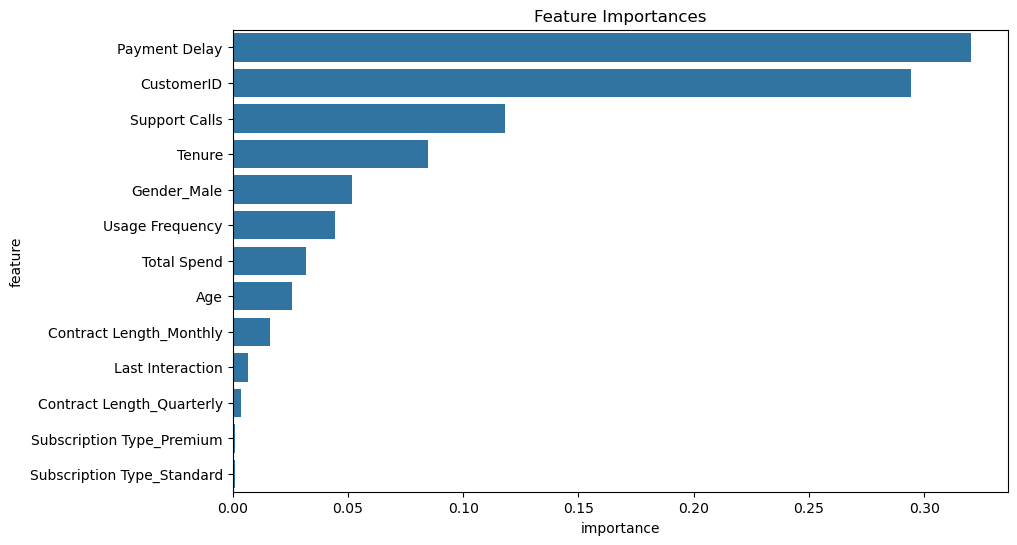

In [161]:
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances_df)
plt.title('Feature Importances')
plt.show()